In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('/content/soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Unnamed: 15
0,443,England,Premier League,(WOL),Raul Jimenez,37,1,3445,17,18.49,0.51,118,43,3.25,1.19,2019
1,444,England,Premier League,(MNC),Kevin De Bruyne,32,3,2984,13,7.22,0.23,99,31,3.15,0.99,2019
2,445,England,Premier League,(LEI),Jamie Vardy,34,1,3271,23,19.28,0.56,89,42,2.58,1.22,2019
3,446,England,Premier League,(MNC),Raheem Sterling,30,3,2836,20,20.30,0.68,99,38,3.32,1.27,2019
4,447,England,Premier League,(LIV),Sadio Mane,31,4,2933,18,14.51,0.47,77,36,2.49,1.17,2019


In [4]:
df.shape

(219, 16)

Q1: What is the total number of goals scored in the entire dataset?

In [5]:
df['Goals'].sum()

295808

Q2: Which player has scored the most goals as a substitution

In [13]:
most_goals_substitution = df.groupby('Matches_Played')['Goals'].sum()
most_goals_substitution.sort_values().head(1)

Matches_Played
Luis Muriel    264
Name: Goals, dtype: int64

Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [14]:
most_goals_substitution.sort_values().head(5)

Matches_Played
Luis Muriel          264
Niclas Fullkrug      293
Luis Suarez          387
Cristiano Ronaldo    397
Ansu Fati            451
Name: Goals, dtype: int64

Q4: What are the top 10 countries with the most number of players in the dataset?

In [16]:
most_goals_countries = df.groupby('Country')['Goals'].sum()
most_goals_countries.sort_values().head(10)

Country
554    264
574    293
532    387
555    397
540    451
591    452
590    454
522    465
573    481
588    482
Name: Goals, dtype: int64

Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?
Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [17]:
data = df

lower_quantile = df['Mins'].quantile(0.01)
upper_quantile = df['Mins'].quantile(0.99)

filtered_df = df[(df['Mins'] >= lower_quantile) & (df['Mins'] <= upper_quantile)]

row_difference = df.shape[0] - filtered_df.shape[0]
row_difference

2

Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [19]:
player_goals = df.groupby('Matches_Played')['Goals'].sum().reset_index()

sorted_players = player_goals.sort_values(by='Goals', ascending=False)

top_5_players = sorted_players.head(5)
top_5_players

,Matches_Played,Goals
187,Thiago Galhardo,4506
167,Raul Jimenez,4317
23,Bruno Henrique,4234
96,Jamie Vardy,4051
142,Mohamed Salah,3876


Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

   Unnamed: 15  Goals
0         2020    397


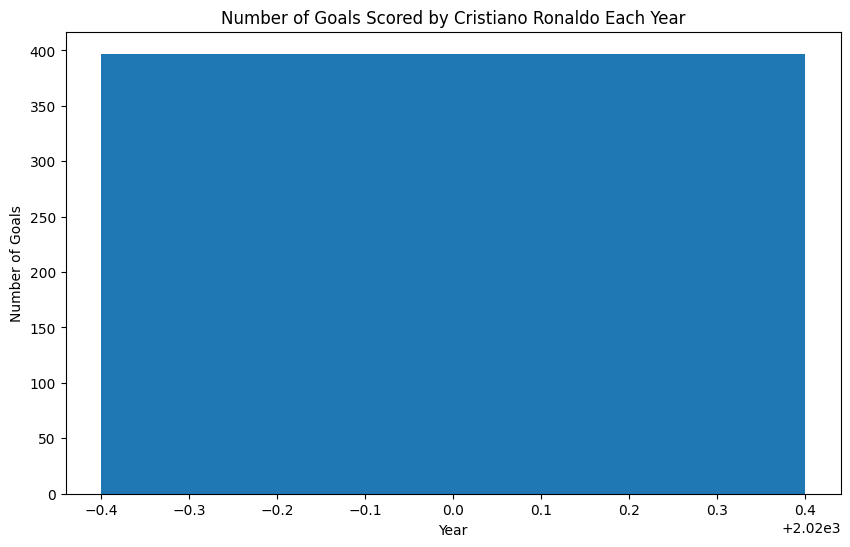

In [40]:
ronaldo_goals = df[df['Matches_Played'] == 'Cristiano Ronaldo']

# Group by 'Year' and sum the 'Goals' for Cristiano Ronaldo in each year
ronaldo_goals_by_year = ronaldo_goals.groupby('Unnamed: 15')['Goals'].sum().reset_index()
print(ronaldo_goals_by_year)
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(ronaldo_goals_by_year['Unnamed: 15'], ronaldo_goals_by_year['Goals'])
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.title('Number of Goals Scored by Cristiano Ronaldo Each Year')
plt.show()

Q8. In the year 2019 who has more Goals between Ronaldo and Messi?
First print them normally
Display the comparison using a bar plot

Ronaldo's goals in 2019: 0
Messi's goals in 2019: 0


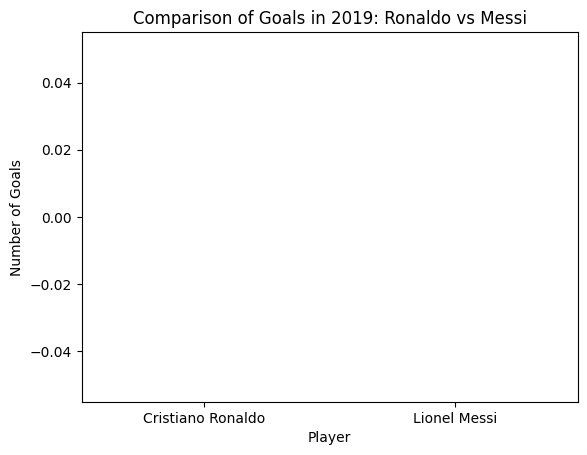

In [41]:
df_2019 = df[df['Unnamed: 15'] == 2019]

ronaldo_2019 = df_2019[df_2019['Matches_Played'] == 'Cristiano Ronaldo']

messi_2019 = df_2019[df_2019['Matches_Played'] == 'Lionel Messi']

print(f"Ronaldo's goals in 2019: {ronaldo_2019['Goals'].sum()}")
print(f"Messi's goals in 2019: {messi_2019['Goals'].sum()}")

plt.bar(['Cristiano Ronaldo', 'Lionel Messi'], [ronaldo_2019['Goals'].sum(), messi_2019['Goals'].sum()], color=['blue', 'orange'])
plt.xlabel('Player')
plt.ylabel('Number of Goals')
plt.title('Comparison of Goals in 2019: Ronaldo vs Messi')
plt.show()

Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

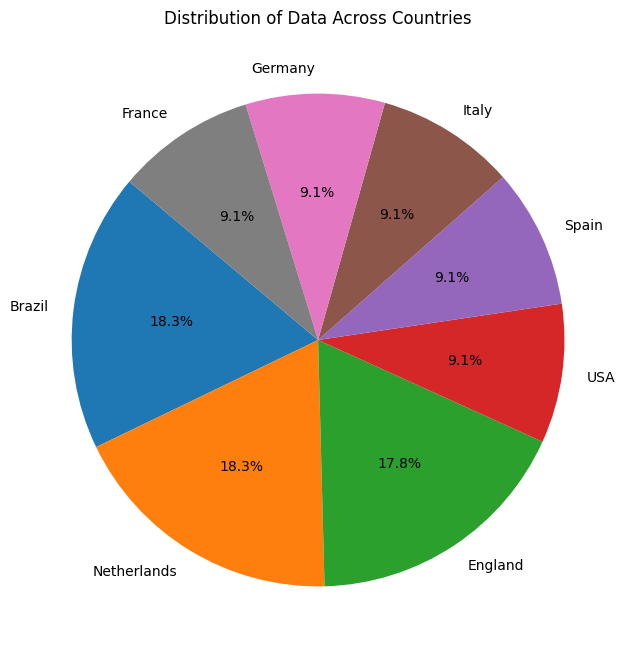

In [43]:
country_counts = df['League'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data Across Countries')
plt.show()

Q10: Display a Heatmap to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

<ipython-input-31-7118f503d0d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


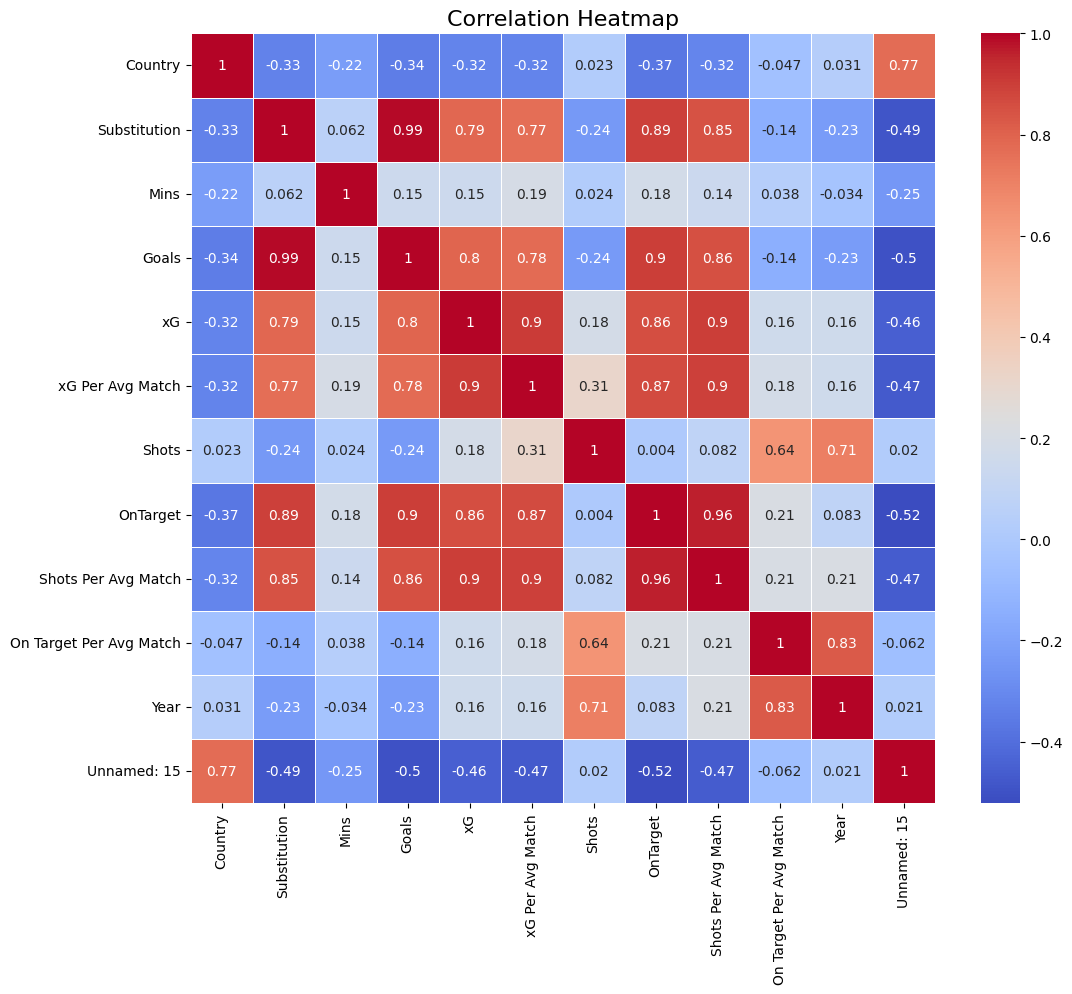

In [31]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontsize=16)
plt.show()

Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [45]:
df_2020 = df[df['Unnamed: 15'] == 2020]

median_on_target_shots = df_2020.groupby('League')['On Target Per Avg Match'].median()
median_on_target_shots

League
Brazil         2.740
England        2.830
France         3.015
Germany        2.950
Italy          3.085
Netherlands    2.685
Spain          2.675
USA            2.535
Name: On Target Per Avg Match, dtype: float64

Q12. Who has the best average Goals per minute?
Consider only those players who have played more than 30 games
Then Find Goals per minute
Find Mean of Goals per minute and sort the values

Q 13. Which Player has the least and most number of missed shots in the dataset?

In [ ]:
df['MissedShots'] = df['Shots'] - df['ShotsOnTarget']

least_missed_shots_player = df.loc[df['MissedShots'].idxmin()]['Player']
most_missed_shots_player = df.loc[df['MissedShots'].idxmax()]['Player']

print(f"The player with the least missed shots is: {least_missed_shots_player}")
print(f"The player with the most missed shots is: {most_missed_shots_player}")

Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [54]:
countries_count = df.groupby('Country')['League'].value_counts()

# Plotting the bar plot
countries_count

Country  League     
443      England        1
444      England        1
445      England        1
446      England        1
447      England        1
                       ..
657      Netherlands    1
658      Netherlands    1
659      Netherlands    1
660      Netherlands    1
661      Netherlands    1
Name: League, Length: 219, dtype: int64

Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

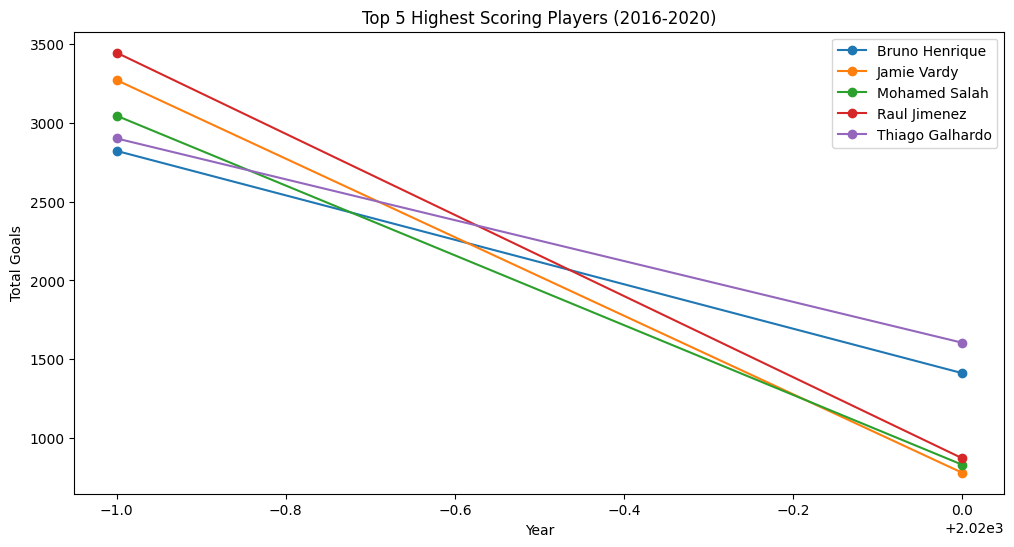

In [56]:
df_subset = df[(df['Unnamed: 15'] >= 2016) & (df['Unnamed: 15'] <= 2020)]

# Group by 'Player' and sum the 'Goals' for each player in each year
player_goals = df_subset.groupby(['Matches_Played', 'Unnamed: 15'])['Goals'].sum().reset_index()

# Find the top 5 players based on total goals
top_players = player_goals.groupby('Matches_Played')['Goals'].sum().nlargest(5).index

# Filter data for the top 5 players
top_players_data = player_goals[player_goals['Matches_Played'].isin(top_players)]

# Plotting the line chart
plt.figure(figsize=(12, 6))
for player in top_players_data['Matches_Played'].unique():
    player_data = top_players_data[top_players_data['Matches_Played'] == player]
    plt.plot(player_data['Unnamed: 15'], player_data['Goals'], label=player, marker='o')

plt.xlabel('Year')
plt.ylabel('Total Goals')
plt.title('Top 5 Highest Scoring Players (2016-2020)')
plt.legend()
plt.show()